Experiment Name : Decision Tree
 
User : John Doe (djoe)

Importing Relavant Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve


#clearml
from clearml import Task, Logger


#joblib
try:
    import joblib
except ImportError:
    from sklearn.externals import joblib


Connecting ClearML

In [2]:
# Connecting ClearML
from clearml import Task
task = Task.init(project_name='Movie Rating Prediction', task_name='Decision Tree v1 on Data 1')

ClearML Task: created new task id=6adf17a9ee184e488da7e8d96e4c897c
2022-11-10 23:17:31,875 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/99ef1f8d69624d71b5de4a2c3f168b18/experiments/6adf17a9ee184e488da7e8d96e4c897c/output/log


In [3]:
# Data Pull
df=pd.read_csv("Data/MovieRatings_data2.csv")
df

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code,age_group
0,233.0,Exotica (1994),Drama,3,1968,4,978297068,231.0,M,25.0,3.0,55455,20-29
1,2191.0,"Merry War, A (1997)",Comedy,18,367,4,978152486,2123.0,F,35.0,0.0,13064,30-39
2,1517.0,Austin Powers: International Man of Mystery (1...,Comedy,14,3578,4,978200828,1483.0,M,18.0,4.0,54481,10-19
3,3006.0,"Insider, The (1999)",Drama,23,3618,3,978460576,2938.0,F,25.0,0.0,55345,20-29
4,48.0,Pocahontas (1995),Animation|Children's|Musical|Romance,1,1207,4,978300719,48.0,M,25.0,4.0,92107,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,829.0,Joe's Apartment (1996),Comedy|Musical,10,3500,5,978228153,819.0,M,35.0,7.0,60611,30-39
3489,1457.0,Fools Rush In (1997),Comedy|Romance,13,380,3,978201927,1431.0,M,56.0,6.0,91011,50-59
3490,1684.0,Mrs. Dalloway (1997),Romance,15,2506,2,978198277,1639.0,M,25.0,17.0,95405,20-29
3491,2577.0,Metroland (1997),Comedy|Drama,20,1923,4,978143576,2509.0,M,25.0,5.0,36109,20-29


In [4]:
from clearml import Dataset

# Preprocessed dataset can be stored into clearml as a dataset version

dataset = Dataset.create(dataset_name='dataset2',dataset_project='Movie Rating Prediction')
dataset.add_files('Data/MovieRatings_data2.csv')
dataset.upload()
dataset.finalize()

ClearML results page: https://app.clear.ml/projects/dbaccea7572f4e5d8f23b1d3ee685081/experiments/a91918aa3af74038b810d92bd5389fea/output/log
ClearML dataset page: https://app.clear.ml/datasets/simple/dbaccea7572f4e5d8f23b1d3ee685081/experiments/a91918aa3af74038b810d92bd5389fea
Uploading dataset changes (1 files compressed to 120.71 KiB) to https://files.clear.ml
File compression and upload completed: total size 120.71 KiB, 1 chunk(s) stored (average size 120.71 KiB)
2022-11-10 23:17:48,289 - clearml.Task - INFO - Waiting to finish uploads
2022-11-10 23:17:48,554 - clearml.Task - INFO - Finished uploading


True

Exploratory Data Analysis

In [5]:
df.describe()

,MovieIDs,ID,MovieID,Ratings,TimeStamp,UserID,Age,Occupation
count,3493.000000,3493.000000,3493.000000,3493.000000,3.493000e+03,3493.000000,3493.000000,3493.000000
mean,2002.874606,16.256799,1810.537647,3.560263,9.785946e+08,1958.405955,30.527054,8.241340
std,1147.475803,7.475210,1078.401733,1.090751,2.336840e+06,1121.858091,13.114863,6.347686
min,2.000000,1.000000,1.000000,1.000000,9.781252e+08,2.000000,1.000000,0.000000
25%,1003.000000,10.000000,951.000000,3.000000,9.781533e+08,991.000000,25.000000,3.000000
50%,2039.000000,18.000000,1732.000000,4.000000,9.782244e+08,1971.000000,25.000000,7.000000
75%,2997.000000,23.000000,2694.000000,4.000000,9.782976e+08,2929.000000,35.000000,14.000000
max,3952.000000,28.000000,3952.000000,5.000000,1.009669e+09,3883.000000,56.000000,20.000000


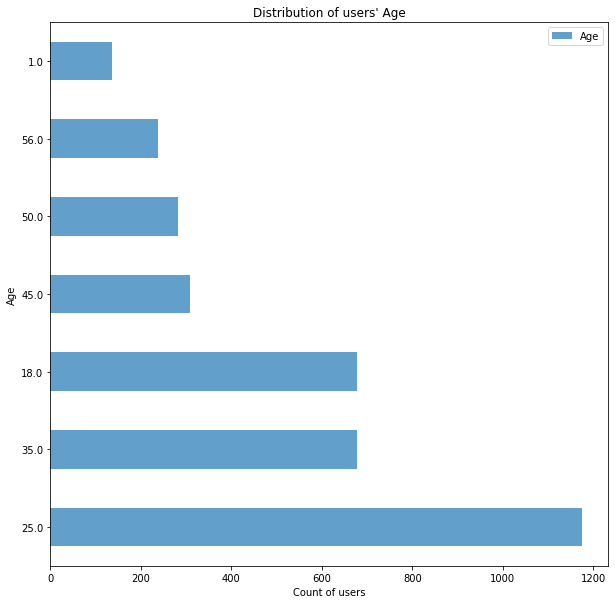

In [6]:
#Visualize user age distribution
df['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))

plt.title("Distribution of users' Age")
plt.xlabel('Count of users')
plt.ylabel('Age')

plt.show()

Text(0.5, 0, 'Age')

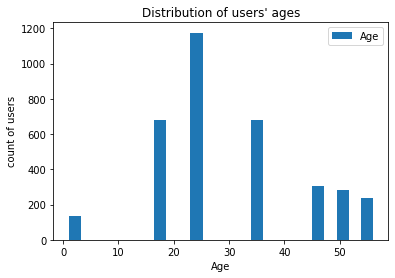

In [7]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [8]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,25.0,20-29
1,35.0,30-39
2,18.0,10-19
13,45.0,40-49
14,56.0,50-59
19,50.0,50-59
53,1.0,0-9


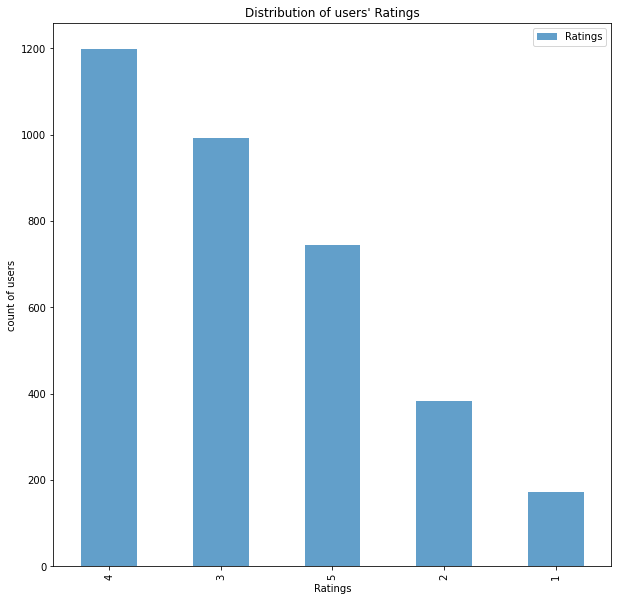

In [9]:
#Visualize overall rating by users
df['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))

plt.title("Distribution of users' Ratings")
plt.ylabel('count of users')
plt.xlabel('Ratings')

plt.show()

Model Training

In [10]:
#Training only on 500 for faster compute in the tutorial
df=df[:500]

In [11]:
features = df[['MovieID','Age','Occupation']].values

labels = df['Ratings'].values

In [12]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [13]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    # print("TRAINING SCORES",train_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt,train_scores_mean,test_scores_mean,fit_times_mean


Logging Accuracy and Time to Fit as scalers in clear ML

In [22]:
USER_MODEL_VERSION=2

In [23]:
# Set script parameters
task_params = {'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto'}
 
task_params = task.connect(task_params)


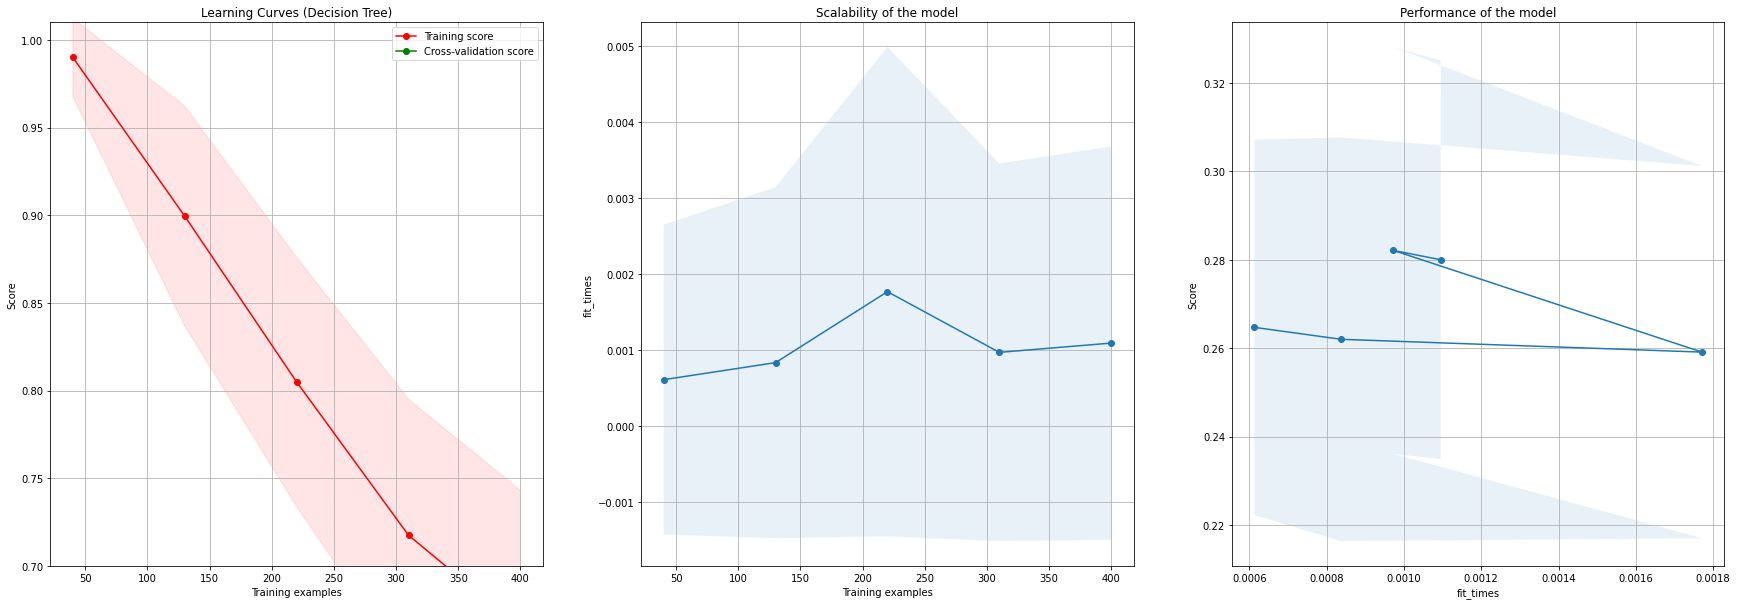

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from clearml import Task, Logger

# Connecting ClearML with the current process,
# from here on everything is logged automatically


Task.current_task()

fig, fig_axes = plt.subplots(1, 3, figsize=(30, 10))

#Create train and test data set
# train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

X, y =features, labels
title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(**task_params)

plt,a,b,c=plot_learning_curve(estimator, title, X, y, axes=fig_axes, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

epoch=USER_MODEL_VERSION

Logger.current_logger().report_scalar(title='Train Accuracy', 
            series='train_scores_mean', value=a.mean(), iteration=epoch)
Logger.current_logger().report_scalar(title='Test Accuracy', 
            series='test_scores_mean', value=b.mean(), iteration=epoch)
Logger.current_logger().report_scalar(title='Fit Time', 
            series='fit_times_mean', value=c.mean(), iteration=epoch)


In [25]:
# Store the Model into ClearML as an Artifact

random_forest = DecisionTreeClassifier(**task_params)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
joblib.dump(random_forest, 'decision_tree_djoe_data2.pkl', compress=True)
print("Model Stored with Accuracy",acc_random_forest)